<a href="https://colab.research.google.com/github/NazariiDovhan19/sales-performance-analysis/blob/main/Sales_Performance_Analysis_(EDA_%26_KPIs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sales_data.csv to sales_data.csv
DATA PREVIEW


,order_id,order_date,product,category,region,quantity,price
0,1001,2023-01-05,Laptop Pro,Electronics,London,1,1200
1,1002,2023-01-06,Wireless Mouse,Accessories,London,2,25
2,1003,2023-01-10,Office Chair,Furniture,Manchester,1,180
3,1004,2023-01-15,Monitor 27,Electronics,Birmingham,2,320
4,1005,2023-02-02,Laptop Pro,Electronics,London,1,1200



DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    30 non-null     int64 
 1   order_date  30 non-null     object
 2   product     30 non-null     object
 3   category    30 non-null     object
 4   region      30 non-null     object
 5   quantity    30 non-null     int64 
 6   price       30 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.8+ KB

DESCRIPTIVE STATISTICS


,order_id,quantity,price
count,30.000000,30.000000,30.000000
mean,1015.500000,1.466667,446.666667
std,8.803408,0.776079,430.911891
min,1001.000000,1.000000,25.000000
25%,1008.250000,1.000000,116.250000
50%,1015.500000,1.000000,250.000000
75%,1022.750000,2.000000,900.000000
max,1030.000000,4.000000,1200.000000



MISSING VALUES


,0
order_id,0
order_date,0
product,0
category,0
region,0
quantity,0
price,0



KEY KPIs
Total Revenue: £15,085.00
Total Orders: 30
Average Order Value (AOV): £502.83


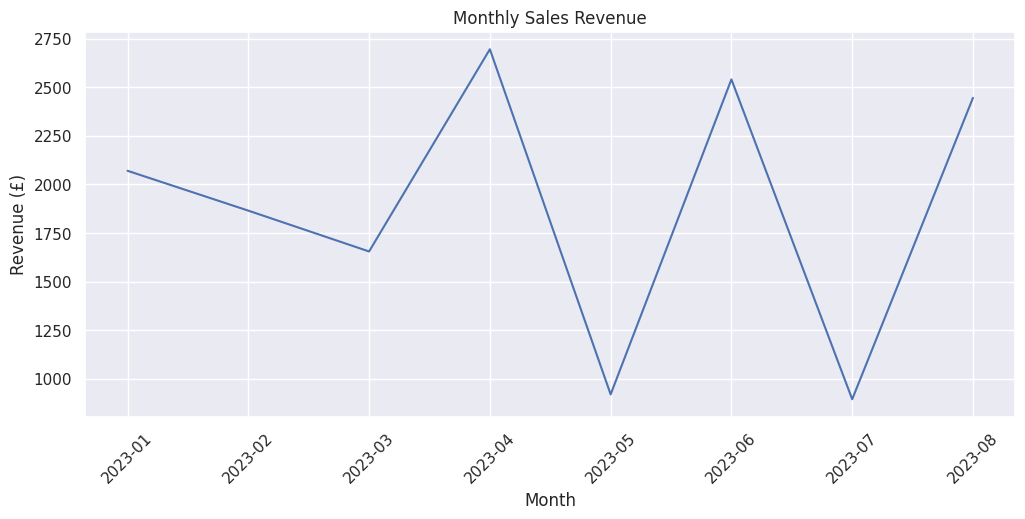

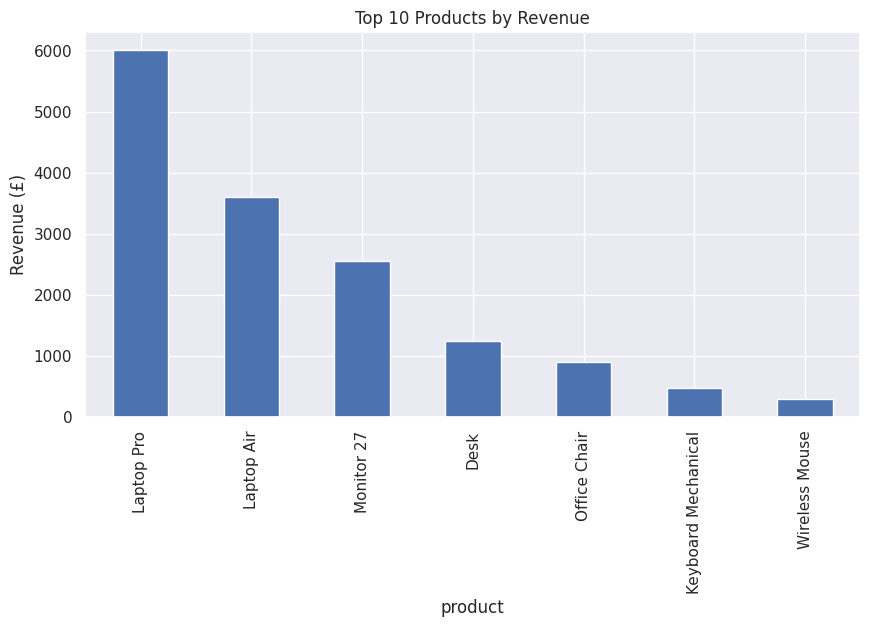

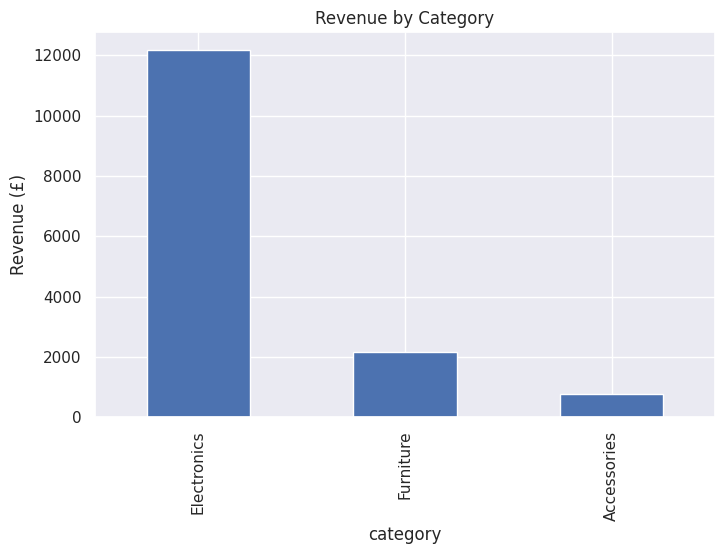

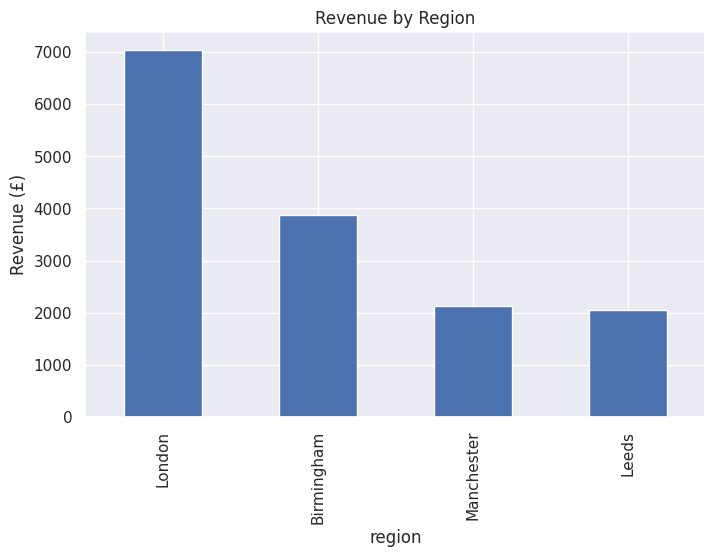

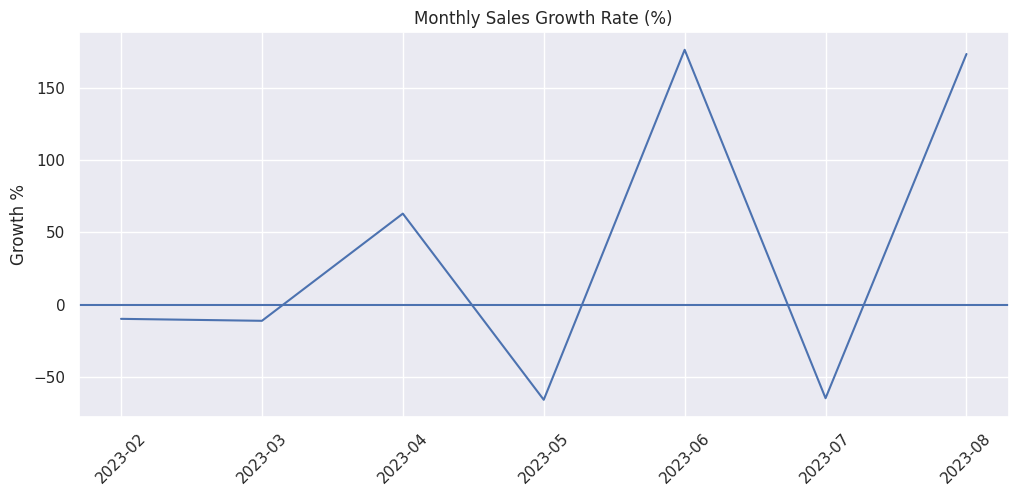


KEY INSIGHTS
- Identified seasonal sales trends and revenue fluctuations
- Determined top-performing products and categories
- Found regions generating the highest revenue
- Monthly growth analysis highlights unstable periods

BUSINESS RECOMMENDATIONS
- Focus marketing on high-revenue products
- Invest in top-performing regions
- Improve sales strategy during low-growth months



In [4]:
# =========================
# SALES PERFORMANCE ANALYSIS
# EDA & KPI PROJECT
# =========================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

# 2. LOAD DATA
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# 3. INITIAL DATA CHECK
print("DATA PREVIEW")
display(df.head())

print("\nDATA INFO")
df.info()

print("\nDESCRIPTIVE STATISTICS")
display(df.describe())

# 4. DATA CLEANING
print("\nMISSING VALUES")
display(df.isna().sum())

df = df.drop_duplicates()
df['order_date'] = pd.to_datetime(df['order_date'])

# Revenue calculation
df['revenue'] = df['quantity'] * df['price']

# 5. FEATURE ENGINEERING
df['month'] = df['order_date'].dt.to_period('M')
df['year'] = df['order_date'].dt.year

# 6. KPI CALCULATIONS
total_revenue = df['revenue'].sum()
total_orders = df['order_id'].nunique()
average_order_value = df.groupby('order_id')['revenue'].sum().mean()

print("\nKEY KPIs")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): £{average_order_value:,.2f}")

# 7. MONTHLY SALES ANALYSIS
monthly_sales = df.groupby('month')['revenue'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['month'], monthly_sales['revenue'])
plt.xticks(rotation=45)
plt.title("Monthly Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.show()

# 8. SALES BY PRODUCT (TOP 10)
top_products = (
    df.groupby('product')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue (£)")
plt.show()

# 9. SALES BY CATEGORY
category_sales = (
    df.groupby('category')['revenue']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Revenue by Category")
plt.ylabel("Revenue (£)")
plt.show()

# 10. SALES BY REGION
region_sales = (
    df.groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title("Revenue by Region")
plt.ylabel("Revenue (£)")
plt.show()

# 11. MONTHLY GROWTH RATE
monthly_sales['growth_rate_%'] = monthly_sales['revenue'].pct_change() * 100

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['month'], monthly_sales['growth_rate_%'])
plt.axhline(0)
plt.xticks(rotation=45)
plt.title("Monthly Sales Growth Rate (%)")
plt.ylabel("Growth %")
plt.show()

# 12. FINAL INSIGHTS
print("""
=========================
KEY INSIGHTS
=========================
- Identified seasonal sales trends and revenue fluctuations
- Determined top-performing products and categories
- Found regions generating the highest revenue
- Monthly growth analysis highlights unstable periods

=========================
BUSINESS RECOMMENDATIONS
=========================
- Focus marketing on high-revenue products
- Invest in top-performing regions
- Improve sales strategy during low-growth months
""")
